In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

inmuebles = pd.read_csv('property_census_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


Veamos las dimensiones y las variables de nuestro dataset:

In [2]:
inmuebles.shape

(9520, 8)

In [3]:
inmuebles.columns


Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

### Método info() 
nos permite ver rapidamente caracteristicas del DataFrame como el tipo de dato, la cantidad de datos no nulos y el uso de memoria.

     

In [4]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


### Método describe()
Es una forma más completa de generar un análisis rápido que nos da un resumen estadístico de las variables numéricas.

In [5]:
inmuebles.describe()

,Habitaciones,Baños,Área
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


In [6]:
#Quitemos el número de decimales para que se vea mejor
pd.options.display.float_format = '{:.2f}'.format
inmuebles.describe()

,Habitaciones,Baños,Área
count,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66
std,2.05,1.26,1731.38
min,1.00,0.00,2.00
25%,2.00,2.00,57.00
50%,3.00,2.00,80.00
75%,3.00,3.00,135.00
max,110.00,9.00,166243.00


## Análisis de variable numérica
Aprovechemos que la columna Área es de tipo numérico para calcular la media y los valores extremos de esta:

In [7]:
inmuebles.Área.mean()


146.66470588235293

In [8]:

print(f"El inmueble con mayor área tiene {inmuebles.Área.max()} metros cuadrados, mientras que el de menor área posee {inmuebles.Área.min()}")

El inmueble con mayor área tiene 166243 metros cuadrados, mientras que el de menor área posee 2


El valor mínimo de Área parece ser un outlier, ya que es muy pequeño en comparación con el resto de los valores. Veamos cuántos valores más hay por debajo de 10 metros cuadrados:

In [9]:
#cuenta con una máscara los inmuebles que tienen un área inferior a 10 metros cuadrados
inmuebles[inmuebles.Área < 10]


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000
9256,Apartamento,Apartamento en venta en Rafael Uribe Uribe,2,1,5,Rafael Uribe Uribe,Los Alcázares,$ 200.000.000


In [10]:
#ahora eliminamos los inmuebles que tienen un área inferior a 10 metros cuadrados y actualizamos el dataframe
inmuebles = inmuebles[inmuebles.Área >= 10]


In [11]:
#veamos si los valores extremos de la columna área tienen sentido ahora:
print(f"El inmueble con mayor área tiene {inmuebles.Área.max()} metros cuadrados, mientras que el de menor área posee {inmuebles.Área.min()}.")

El inmueble con mayor área tiene 166243 metros cuadrados, mientras que el de menor área posee 15.


La siguiente columna que vamos a analizar es Precio. Sin embargo, por el tipo de dato que tiene, primero hay que realizarle modificaciones para poder operar con ella:

In [12]:
#El signo pesos y los puntos son caracteres que no permiten hacer operaciones matemáticas
inmuebles["valor"] = inmuebles["Valor"].str[1:]
inmuebles["valor"] = inmuebles["valor"].str.replace(".","", regex = True)
#Con el formato actual ahora es válido realizar una conversión de tipo string a tipo numérico:
inmuebles["valor"] = pd.to_numeric(inmuebles["valor"])


In [13]:
#Para mejorar la legibilidad reescalemos los valores de la columna "valor" a millones de pesos:
inmuebles["valor"] = inmuebles["valor"].astype(float)/1000000

In [14]:
inmuebles["valor"].max()
inmuebles["valor"].min()
print(f"El inmueble más costoso tiene un valor de {inmuebles['valor'].max()} Millones de pesos colombianos")
print(f"El inmueble más económico tiene un valor de {inmuebles['valor'].min()} Millones de pesos colombianos")



El inmueble más costoso tiene un valor de nan Millones de pesos colombianos
El inmueble más económico tiene un valor de nan Millones de pesos colombianos


In [15]:
promedio = inmuebles["valor"].median()
print(f"El promedio de la columna 'valor' es {round(promedio, 2)} Millones de pesos colombianos")

El promedio de la columna 'valor' es nan Millones de pesos colombianos


Veamos ahora la distribución que sigue la variable Precio. Usaré la librería seaborn porque permite declarar más parámetros.

c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\seaborn\distributions.py:687: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.autoscale_view()


<Axes: xlabel='valor', ylabel='Count'>

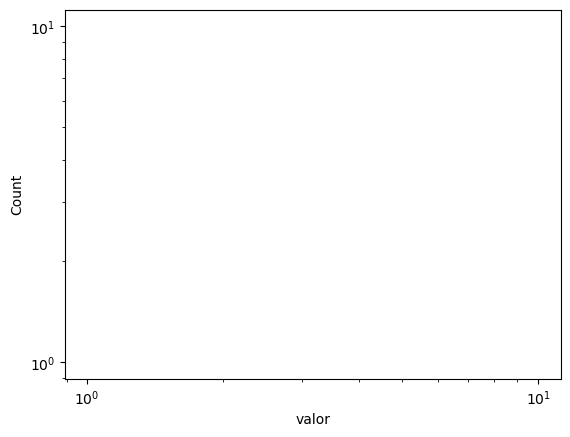

In [16]:
sns.histplot(data=inmuebles["valor"], log_scale=(True, True), stat="count" , bins=50, color='Green',)
#histograma de las fecuencias absolutas de la columna "valor" dividida en intervalos de 50 millones de pesos

## Análisis de la variable categorica "Barrio"
A fin de ejemplo, voy a usar una máscara para crear un sub-DataFrame compuesto por las filas que cumplan con una condición en su columna "Barrio" (Chicó Reservado)

In [17]:
#Máscara: es una lista que usa valores booleanos para filtrar un DataFrame
inmuebles_chico = (inmuebles.Barrio == "Chico Reservado")
#creación del subconjunto de datos
Df_chico_reservado = inmuebles[inmuebles_chico]
Df_chico_reservado.head(7)



,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,valor
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,NaN
39,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000,NaN
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000,NaN
126,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000,NaN
143,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000,NaN
163,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000,NaN
307,Apartamento,Apartamento en venta en Chico Reservado,3,3,166,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000,NaN


In [18]:
#Otra manipulación interesante es la cantidad de inmuebles por barrio.
inmuebles.Barrio.value_counts()

Barrio
Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: count, Length: 149, dtype: int64

Hay 149 barrrios en nuestra base de datos, el barrio con mayor frecuencia es Usaquén, con 1.000 registros; Hay varios barrios que aparecen una sola vez, siendo esta la menor frecuencia absoluta.

A continuación, y para dar por términado el Análisis Exploratorio de Datos, voy a crear una gráfica de barras que muestre la frecuencia de los 5 barrios más comunes del sub-DataFrame visto antes.


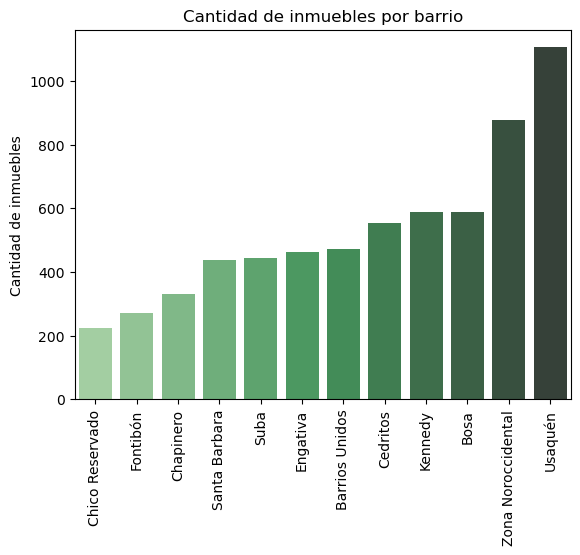

In [19]:
#Realiza el mismo gráfico anterior pero con seaborn, coloreado en orden ascendente
sns.countplot(x="Barrio", data=inmuebles, order = inmuebles.Barrio.value_counts(ascending=True).iloc[137:].index , palette="Greens_d")
#El método value_counts() nos permite contar la cantidad de veces que se repite un valor en una columna
plt.xticks(rotation=90)
plt.ylabel("Cantidad de inmuebles")
plt.xlabel("")
plt.title("Cantidad de inmuebles por barrio")
plt.show()


In [20]:


#
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio['Valor_m2_Barrio'] = datos_barrio['valor']/datos_barrio['Área']
datos_barrio

,Tipo,Descripcion,Habitaciones,Baños,Área,UPZ,Valor,valor,Valor_m2_Barrio
Barrio,,,,,,,,,
Alameda,Apartamento,Apartamento en venta en Alameda,3,2,97,Engativá,$ 580.000.000,0.00,0.00
Alhambra,ApartamentoApartamentoCasaCasaCasaApartamentoC...,Apartamento en venta en AlhambraApartamento en...,51,50,3237,La AlhambraLa AlhambraLa AlhambraLa AlhambraLa...,$ 400.000.000$ 780.000.000$ 1.100.000.000$ 1.4...,0.00,0.00
Andes Norte,CasaApartamentoCasaApartamentoApartamentoApart...,Casa en venta en Andes NorteApartamento en ven...,21,20,874,La FlorestaLa FlorestaLa FlorestaLa FlorestaLa...,$ 750.000.000$ 585.000.000$ 750.000.000$ 1.260...,0.00,0.00
Antonio Nariño,ApartamentoApartamentoCasaApartamentoApartamen...,Apartamento en venta en Antonio NariñoApartame...,207,120,7827,RestrepoRestrepoRestrepoRestrepoRestrepoRestre...,$ 175.000.000$ 122.000.000$ 850.000.000$ 245.0...,0.00,0.00
Barrancas,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en BarrancasApartamento e...,43,32,1053,San Cristóbal NorteSan Cristóbal NorteSan Cris...,$ 238.000.000$ 238.000.000$ 238.000.000$ 233.0...,0.00,0.00
...,...,...,...,...,...,...,...,...,...
Villa Maria,CasaCasaCasaCasaCasaApartamentoCasaCasaCasaCas...,Casa en venta en Villa MariaCasa en venta en V...,61,48,2693,El RincónEl RincónEl RincónEl RincónEl RincónE...,$ 240.000.000$ 437.000.000$ 437.000.000$ 437.0...,0.00,0.00
Villas De Granada,ApartamentoApartamentoCasaApartamentoApartamen...,Apartamento en venta en Villas De GranadaApart...,76,51,1905,Garcés NavasGarcés NavasGarcés NavasGarcés Nav...,$ 215.625.000$ 230.000.000$ 260.000.000$ 250.0...,0.00,0.00
Villemar,ApartamentoApartamentoApartamentoCasaApartamen...,Apartamento en venta en VillemarApartamento en...,53,37,1384,FontibónFontibónFontibónFontibónFontibónFontib...,$ 360.000.000$ 205.000.000$ 245.000.000$ 600.0...,0.00,0.00


In [21]:
#Guardo en un diccionario la columna Valor_m2_Barrio
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])
m2_barrio

{'Alameda': 0.0,
 'Alhambra': 0.0,
 'Andes Norte': 0.0,
 'Antonio Nariño': 0.0,
 'Barrancas': 0.0,
 'Barrios Unidos': 0.0,
 'Bella Suiza': 0.0,
 'Bellavista Occidental': 0.0,
 'Bochica': 0.0,
 'Bogotá D.C': 0.0,
 'Bosa': 0.0,
 'Bosa Piamonte': 0.0,
 'Bosa Porvenir': 0.0,
 'Bosque De Pinos': 0.0,
 'Bosque Popular': 0.0,
 'Boyaca ': 0.0,
 'Buenos Aires': 0.0,
 'Candelaria La Nueva': 0.0,
 'Cantagallo': 0.0,
 'Capellania': 0.0,
 'Casablanca': 0.0,
 'Castilla': 0.0,
 'Cedritos': 0.0,
 'Cerros De Suba': 0.0,
 'Chapinero': 0.0,
 'Chapinero Alto': 0.0,
 'Chapinero Central': 0.0,
 'Chico Navarra': 0.0,
 'Chico Norte': 0.0,
 'Chico Norte Ii': 0.0,
 'Chico Reservado': 0.0,
 'Ciudad Berna': 0.0,
 'Ciudad Bolívar': 0.0,
 'Ciudad Salitre': 0.0,
 'Ciudadela Colsubsidio': 0.0,
 'Colina Campestre': 0.0,
 'Colinas De Suba': 0.0,
 'Costa Azul': 0.0,
 'Eduardo Santos': 0.0,
 'El Batán': 0.0,
 'El Castillo': 0.0,
 'El Chicó': 0.0,
 'El Contador': 0.0,
 'El Plan': 0.0,
 'El Progreso': 0.0,
 'El Refugio': 0

In [22]:

inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Millon'] = inmuebles['valor']/inmuebles['Área']

In [23]:
#asigno los valores del diccionario a la columna Valor_m2_Barrio a través de un 'mapeo'
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(5)


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,valor,Valor_m2_Barrio,Valor_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,NaN,0.00,NaN
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,NaN,0.00,NaN
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,NaN,0.00,NaN
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,NaN,0.00,NaN
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,NaN,0.00,NaN


Encontremos los top10 Barrios según la cantidad de inmuebles en venta, haciendo uso de dos métodos distintos:

In [24]:
top_barrios = inmuebles["Barrio"].value_counts().head(10).index

In [25]:
#Reseteo el índice para no tener que citar strings
datos_barrio.reset_index(inplace=True)
datos_barrio


,Barrio,Tipo,Descripcion,Habitaciones,Baños,Área,UPZ,Valor,valor,Valor_m2_Barrio
0,Alameda,Apartamento,Apartamento en venta en Alameda,3,2,97,Engativá,$ 580.000.000,0.00,0.00
1,Alhambra,ApartamentoApartamentoCasaCasaCasaApartamentoC...,Apartamento en venta en AlhambraApartamento en...,51,50,3237,La AlhambraLa AlhambraLa AlhambraLa AlhambraLa...,$ 400.000.000$ 780.000.000$ 1.100.000.000$ 1.4...,0.00,0.00
2,Andes Norte,CasaApartamentoCasaApartamentoApartamentoApart...,Casa en venta en Andes NorteApartamento en ven...,21,20,874,La FlorestaLa FlorestaLa FlorestaLa FlorestaLa...,$ 750.000.000$ 585.000.000$ 750.000.000$ 1.260...,0.00,0.00
3,Antonio Nariño,ApartamentoApartamentoCasaApartamentoApartamen...,Apartamento en venta en Antonio NariñoApartame...,207,120,7827,RestrepoRestrepoRestrepoRestrepoRestrepoRestre...,$ 175.000.000$ 122.000.000$ 850.000.000$ 245.0...,0.00,0.00
4,Barrancas,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en BarrancasApartamento e...,43,32,1053,San Cristóbal NorteSan Cristóbal NorteSan Cris...,$ 238.000.000$ 238.000.000$ 238.000.000$ 233.0...,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
144,Villa Maria,CasaCasaCasaCasaCasaApartamentoCasaCasaCasaCas...,Casa en venta en Villa MariaCasa en venta en V...,61,48,2693,El RincónEl RincónEl RincónEl RincónEl RincónE...,$ 240.000.000$ 437.000.000$ 437.000.000$ 437.0...,0.00,0.00
145,Villas De Granada,ApartamentoApartamentoCasaApartamentoApartamen...,Apartamento en venta en Villas De GranadaApart...,76,51,1905,Garcés NavasGarcés NavasGarcés NavasGarcés Nav...,$ 215.625.000$ 230.000.000$ 260.000.000$ 250.0...,0.00,0.00
146,Villemar,ApartamentoApartamentoApartamentoCasaApartamen...,Apartamento en venta en VillemarApartamento en...,53,37,1384,FontibónFontibónFontibónFontibónFontibónFontib...,$ 360.000.000$ 205.000.000$ 245.000.000$ 600.0...,0.00,0.00
147,Zona Franca,Casa,Casa en venta en Zona Franca,2,1,54,Zona Franca,$ 160.000.000,0.00,0.00


In [26]:
datos_barrio.query("Barrio in @top_barrios")

,Barrio,Tipo,Descripcion,Habitaciones,Baños,Área,UPZ,Valor,valor,Valor_m2_Barrio
5,Barrios Unidos,ApartamentoCasaApartamentoApartamentoApartamen...,Apartamento en venta en Barrios UnidosCasa en ...,1525,1196,87799,Los AndesLos AndesLos AndesLos AndesLos AndesL...,$ 445.000.000$ 990.000.000$ 160.000.000$ 460.0...,0.00,0.00
10,Bosa,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en BosaApartamento en ven...,1743,789,34879,Bosa CentralBosa CentralBosa CentralBosa Centr...,$ 225.000.000$ 134.000.000$ 117.000.000$ 132.0...,0.00,0.00
22,Cedritos,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en CedritosApartamento en...,1458,1348,53711,UsaquénUsaquénUsaquénUsaquénUsaquénUsaquénUsaq...,$ 354.000.000$ 354.000.000$ 458.000.000$ 660.0...,0.00,0.00
24,Chapinero,ApartamentoApartamentoApartamentoLocalApartame...,Apartamento en venta en ChapineroApartamento e...,892,913,81248,CHAPINERO: Pardo Rubio + ChapineroCHAPINERO: P...,$ 749.000.000$ 720.000.000$ 650.000.000$ 350.0...,0.00,0.00
50,Engativa,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en EngativaApartamento en...,1676,1077,59808,EngativáEngativáEngativáEngativáEngativáEngati...,$ 258.000.000$ 258.000.000$ 331.500.000$ 202.0...,0.00,0.00
63,Kennedy,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en KennedyApartamento en ...,2151,1233,61475,Kennedy CentralKennedy CentralKennedy CentralK...,$ 680.000.000$ 185.000.000$ 185.000.000$ 195.0...,0.00,0.00
125,Santa Barbara,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en Santa BarbaraApartamen...,1073,1162,54693,USAQUÉN: Country Club + Santa BárbaraUSAQUÉN: ...,$ 565.000.000$ 565.000.000$ 510.000.000$ 425.0...,0.00,0.00
132,Suba,ApartamentoApartamentoApartamentoApartamentoCa...,Apartamento en venta en SubaApartamento en ven...,1497,1202,61615,SubaSubaSubaSubaSubaSubaSubaSubaSubaSubaSubaSu...,$ 469.000.000$ 210.000.000$ 270.000.000$ 325.0...,0.00,0.00
138,Usaquén,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en UsaquénApartamento en ...,3109,3044,148121,UsaquénUsaquénUsaquénUsaquénUsaquénUsaquénUsaq...,$ 890.000.000$ 420.000.000$ 261.500.000$ 349.0...,0.00,0.00
148,Zona Noroccidental,ApartamentoCasaApartamentoCasaCasaCasaCasaCasa...,Apartamento en venta en Zona NoroccidentalCasa...,2778,2204,119084,CHAPINERO: Pardo Rubio + ChapineroCHAPINERO: P...,$ 360.000.000$ 2.519.000.000$ 239.000.000$ 1.6...,0.00,0.00


Text(0.5, 1.0, 'Valor promedio del metro cuadrado para el top10 barrios')

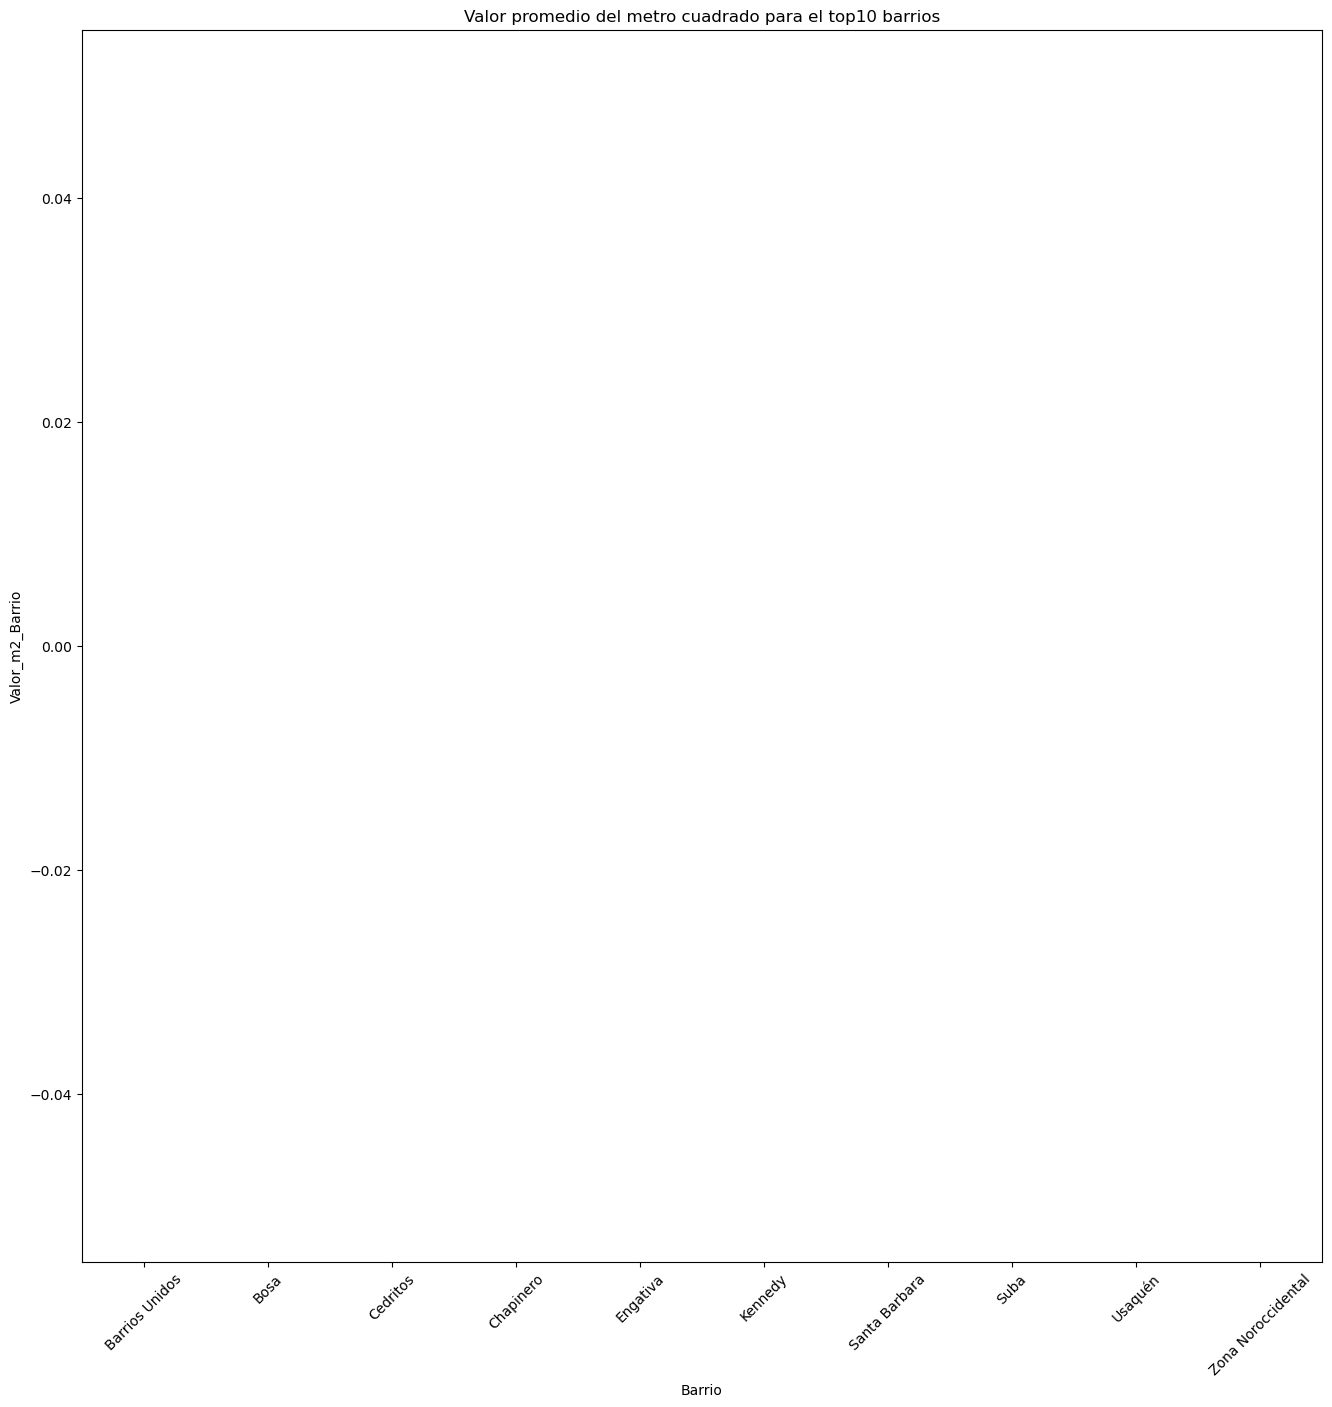

In [27]:
#Gráfico de barras con seaborn
plt.figure(figsize=(16,16))
ax = sns.barplot(x="Barrio", y="Valor_m2_Barrio", data=datos_barrio.query("Barrio in @top_barrios"))
ax.tick_params(axis='x', rotation=45)
ax.set_title("Valor promedio del metro cuadrado para el top10 barrios")

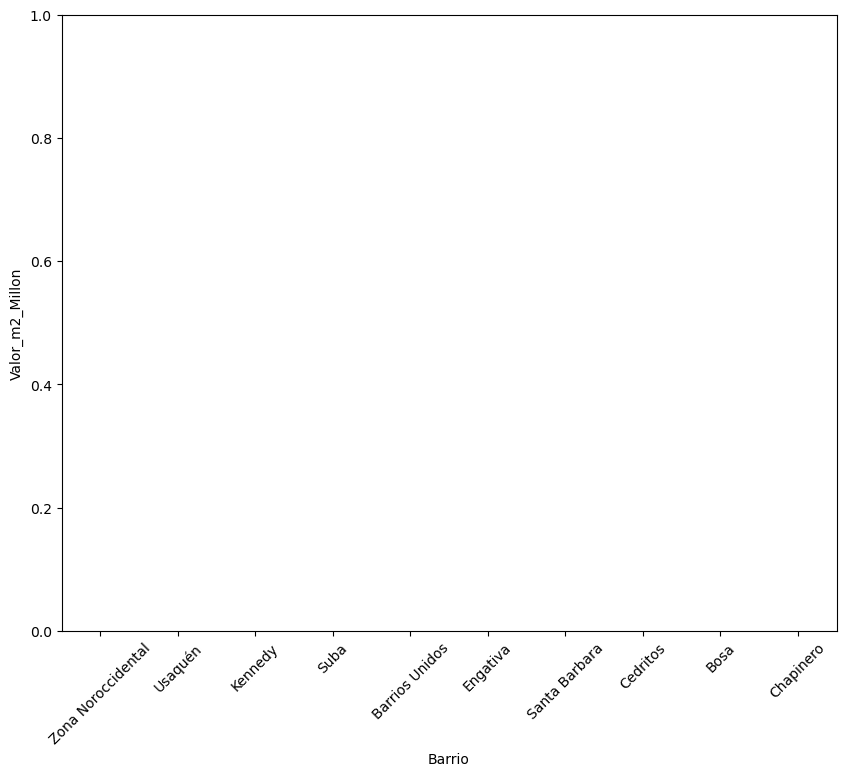

In [28]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Valor_m2_Millon", data = inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)
plt.show()
     

En ambos gráficos de cajas se observa la presencia de outliers, que son los puntos que se encuentran por fuera de los bigotes. En este caso, los outliers son los valores extremos de las variables Área y Precio, que hasta ahora no habíamos detectado.